**Load data**

In [20]:
import pandas as pd

In [21]:
train_data = pd.read_csv('/kaggle/input/deeptweets/train.csv')
test_data = pd.read_csv('/kaggle/input/deeptweets/test.csv')

**Explore the first lines**

In [22]:
train_data.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [23]:
test_data.head()

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


**Descriptive statistics**

In [24]:
train_data.describe()

,TweetId
count,6.525000e+03
mean,2.887131e+17
std,5.139819e+16
min,2.390931e+10
25%,2.941380e+17
50%,3.025319e+17
75%,3.053242e+17
max,3.068341e+17


**Information on data types**

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


****Exploratory data analysis****

Visualize the two classes in the following bar chart

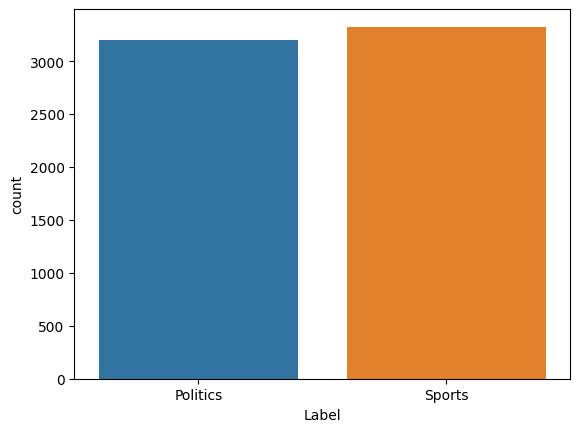

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=train_data)
plt.show()

we see that the two classes are balanced

Identify specific patterns in tweets

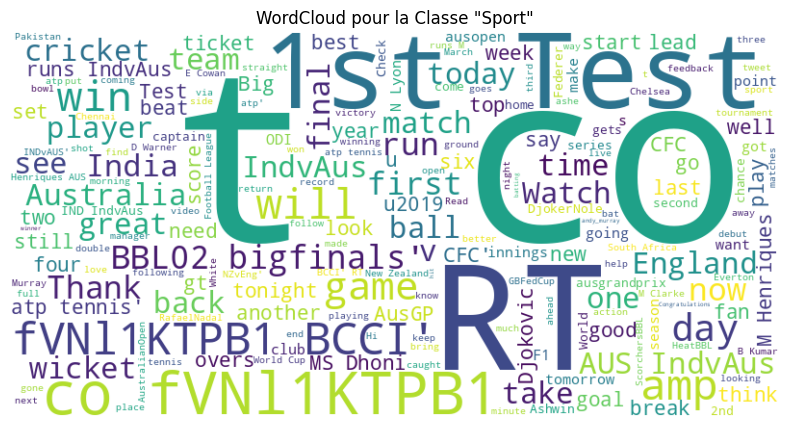

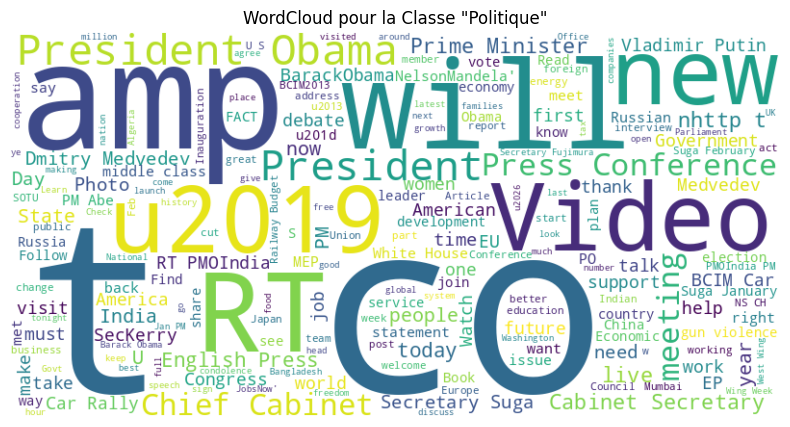

In [27]:
from wordcloud import WordCloud

sport_tweets = train_data[train_data['Label'] == 'Sports']['TweetText'].values
politics_tweets = train_data[train_data['Label'] == 'Politics']['TweetText'].values

# WordCloud pour la classe "Sport"
if len(sport_tweets) > 0:
    wordcloud_sport = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sport_tweets))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_sport, interpolation='bilinear')
    plt.title('WordCloud pour la Classe "Sport"')
    plt.axis('off')
    plt.show()
else:
    print("Aucun tweet dans la classe 'Sport'.")
# WordCloud pour la classe "Politique"
# Vérifier si la classe "Politique" a au moins un tweet
if len(politics_tweets) > 0:
    wordcloud_politics = WordCloud(width=800, height=400, background_color='white').generate(' '.join(politics_tweets))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_politics, interpolation='bilinear')
    plt.title('WordCloud pour la Classe "Politique"')
    plt.axis('off')
    plt.show()
else:
    print("Aucun tweet dans la classe 'Politique'.")

**Preprocessing the Data:**

> 1. Text Cleaning:

Eliminate special characters, URLs, and irrelevant symbols from the tweets.
Convert the text to lowercase to maintain consistency.
> 2. Tokenization:

Tokenize the cleaned text, breaking it into individual words (tokens).
> 3. Stopword Removal:

Remove common stopwords (e.g., "the," "and") to emphasize meaningful words.

In [28]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

custom_stopwords = set(["the", "and", "is", "in", "to", "of", "it", "this", "that"])

# Function for text cleaning
def clean_text(text):
    # Remove special characters and URLs
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters and symbols
    
    # Convert the text to lowercase
    text = text.lower()
    
    return text

# Function for tokenization and stopword removal
def tokenize_and_remove_stopwords(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in custom_stopwords]
    
    return tokens

# Combine text cleaning and tokenization into a single function
def preprocess_text(text):
    cleaned_text = clean_text(text)
    tokens = tokenize_and_remove_stopwords(cleaned_text)
    return ' '.join(tokens)

# Apply preprocessing to each tweet in the dataset
train_data['ProcessedText'] = train_data['TweetText'].apply(preprocess_text)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['ProcessedText'], train_data['Label'], test_size=0.2, random_state=42)



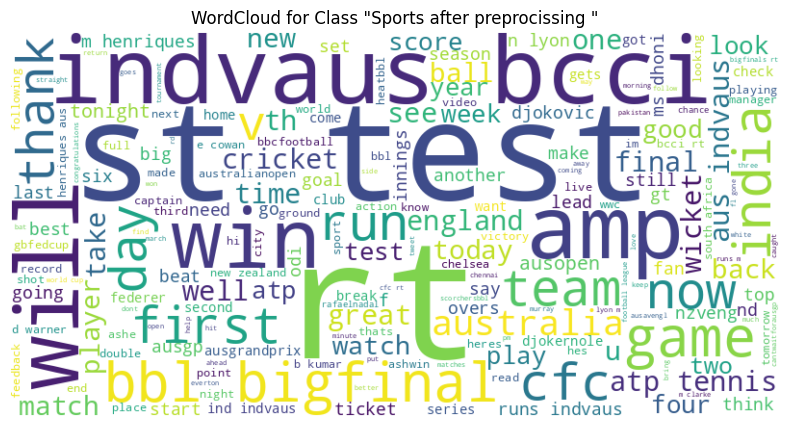

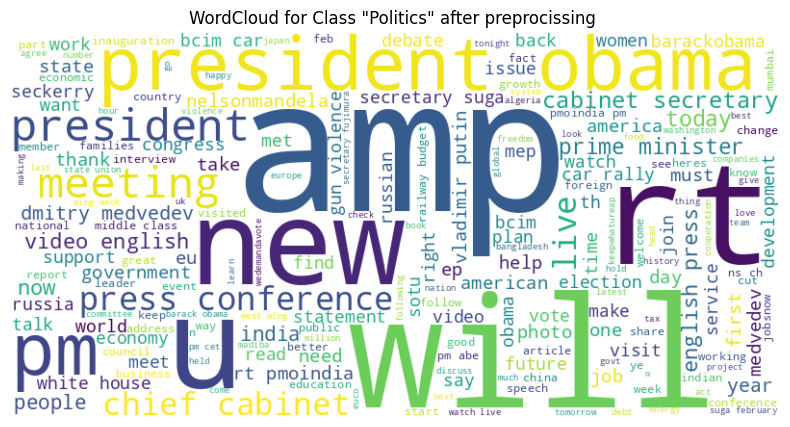

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have 'ProcessedText' column in your datase

# WordCloud for the "Sports" class
sports_tweets = train_data[train_data['Label'] == 'Sports']['ProcessedText'].values
if len(sports_tweets) > 0:
    wordcloud_sports = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sports_tweets))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_sports, interpolation='bilinear')
    plt.title('WordCloud for Class "Sports after preprocissing "')
    plt.axis('off')
    plt.show()
else:
    print("No tweets in the 'Sports' class.")

# WordCloud for the "Politics" class
politics_tweets = train_data[train_data['Label'] == 'Politics']['ProcessedText'].values
if len(politics_tweets) > 0:
    wordcloud_politics = WordCloud(width=800, height=400, background_color='white').generate(' '.join(politics_tweets))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_politics, interpolation='bilinear')
    plt.title('WordCloud for Class "Politics" after preprocissing ')
    plt.axis('off')
    plt.show()
else:
    print("No tweets in the 'Politics' class.")


In [30]:
train_data.head()

,TweetId,Label,TweetText,ProcessedText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerry value statedept usaid measured not do...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina i fear so
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlights wwc final between austr...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,rt chelscanlan at nitro circus at albertpark t...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox always a good thing thanks for feed...


**Feature extraction**

For feature extraction, I'll show you how to use both TF-IDF to represent tweets as numerical vectors.

 Using TF-IDF(Term Frequency-Inverse Document Frequency):

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on your dataset
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


****Model Training****

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels

# Train the SVM model using TF-IDF features
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
svm_predictions = svm_model.predict(X_val_tfidf)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_val, svm_predictions)
svm_classification_rep = classification_report(y_val, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Classification Report:\n", svm_classification_rep)


SVM Accuracy: 0.95
SVM Classification Report:
               precision    recall  f1-score   support

    Politics       0.95      0.94      0.94       638
      Sports       0.94      0.95      0.95       667

    accuracy                           0.95      1305
   macro avg       0.95      0.95      0.95      1305
weighted avg       0.95      0.95      0.95      1305



**Hyperparameter tuning**

Hyperparameter tuning is a crucial step in optimizing the performance of my machine learning model. For SVM, one common hyperparameter to tune is the regularization parameter **C**. The choice of the kernel (**linear**, **rbf**, **poly**, etc.) and other parameters such as the degree of the polynomial **kernel** or the **gamma** parameter can also impact the model's performance.

In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}

svm_model = SVC(random_state=42)

# Create the GridSearchCV object
random_search = RandomizedSearchCV(svm_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform the randomized search on the training data
random_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from the randomized search
best_svm_model = random_search.best_estimator_

# Make predictions on the validation set using the best model
best_predictions = best_svm_model.predict(X_val_tfidf)

# Evaluate the best model
best_accuracy = accuracy_score(y_val, best_predictions)
best_classification_rep = classification_report(y_val, best_predictions)

print(f"Best SVM Accuracy: {best_accuracy:.2f}")
print("Best SVM Classification Report:\n", best_classification_rep)


Best Hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'C': 1}
Best SVM Accuracy: 0.95
Best SVM Classification Report:
               precision    recall  f1-score   support

    Politics       0.95      0.94      0.94       638
      Sports       0.94      0.95      0.95       667

    accuracy                           0.95      1305
   macro avg       0.95      0.95      0.95      1305
weighted avg       0.95      0.95      0.95      1305



**Performance of the model**

break down performance metrics into different stages of the process, including feature extraction, model learning and output prediction

In [34]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Vectorisation des textes avec TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Ajustez max_features en fonction de votre ensemble de données
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Mesurer le temps d'exécution pour l'apprentissage du modèle SVM avec TF-IDF
start_time = time.time()
# Initialiser le modèle SVM
svm_model = SVC(kernel='linear', random_state=42)
# Entraîner le modèle SVM avec TF-IDF
svm_model.fit(X_train_tfidf, y_train)
end_time = time.time()
model_training_time = end_time - start_time

# Mesurer le temps d'exécution pour la prédiction de la sortie avec TF-IDF
start_time = time.time()
# Faire des prédictions sur l'ensemble de validation avec TF-IDF
svm_predictions = svm_model.predict(X_val_tfidf)
end_time = time.time()
output_prediction_time = end_time - start_time

# Évaluer la performance du modèle avec TF-IDF
accuracy = accuracy_score(y_val, svm_predictions)
classification_rep = classification_report(y_val, svm_predictions)

# Afficher les résultats avec les temps d'exécution
print(f"Model Training Time: {model_training_time:.4f} seconds")
print(f"Output Prediction Time: {output_prediction_time:.4f} seconds")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Model Training Time: 1.8580 seconds
Output Prediction Time: 0.3317 seconds
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

    Politics       0.95      0.94      0.94       638
      Sports       0.94      0.95      0.95       667

    accuracy                           0.95      1305
   macro avg       0.95      0.95      0.95      1305
weighted avg       0.95      0.95      0.95      1305



**Test the model**

To test my  model with the test data, you can follow a similar procedure to the one we used for the validation data

In [39]:
# Définir les mêmes fonctions de prétraitement que pour les données d'entraînement
custom_stopwords = set(["the", "and", "is", "in", "to", "of", "it", "this", "that"])

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Supprimer les URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprimer les caractères non alphabétiques et les symboles
    text = text.lower()  # Convertir le texte en minuscules
    return text

def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in custom_stopwords]
    return tokens

def preprocess_text(text):
    cleaned_text = clean_text(text)
    tokens = tokenize_and_remove_stopwords(cleaned_text)
    return ' '.join(tokens)

# Data processing
test_data['ProcessedText'] = test_data['TweetText'].apply(preprocess_text)

X_test_tfidf = tfidf_vectorizer.transform(test_data['ProcessedText'])

svm_predictions_test = svm_model.predict(X_test_tfidf)

svm_predictions_test = svm_model.predict(X_test_tfidf)

test_data['Predicted_Label'] = svm_predictions_test
#print test Data after preprocessing
test_data.head(10)

,TweetId,TweetText,ProcessedText,Predicted_Label
0,306486520121012224,'28. The home side threaten again through Maso...,home side threaten again through mason bennett...,Sports
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....,mrbrown aulia thx for asking see derives from ...,Sports
2,289531046037438464,'@Sochi2014 construction along the shores of t...,sochi construction along shores black sea,Politics
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...,seckerryus remarks after meeting with foreign ...,Politics
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...,iplauction has begun ricky ponting first playe...,Sports
5,305722428531802112,'Viswanathan Anand draws with Fabiano Caruana ...,viswanathan anand draws with fabiano caruana a...,Sports
6,304713516256997377,Have your say on tonight's game - send a text ...,have your say on tonights game send a text sta...,Sports
7,234999630725783553,"'The #olympics may be over, but the #paralympi...",olympics may be over but paralympics are about...,Politics
8,303712268372283392,"'@richaanirudh big compliment, thanks!'",richaanirudh big compliment thanks,Sports
9,304215754130194432,'Espargar\xf3 @PolEspargaro quickest as Jerez ...,espargarxf polespargaro quickest as jerez day ...,Sports


In [40]:
test_data.head()

,TweetId,TweetText,ProcessedText,Predicted_Label
0,306486520121012224,'28. The home side threaten again through Maso...,home side threaten again through mason bennett...,Sports
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....,mrbrown aulia thx for asking see derives from ...,Sports
2,289531046037438464,'@Sochi2014 construction along the shores of t...,sochi construction along shores black sea,Politics
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...,seckerryus remarks after meeting with foreign ...,Politics
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...,iplauction has begun ricky ponting first playe...,Sports


In [43]:
result_df = test_data[['TweetId', 'Predicted_Label']]
result_df.to_csv('Resultat.csv', index=False)